In [276]:
import os, json
from PIL import Image
import numpy as np
from IPython.display import display, Markdown, Latex, clear_output

# Map Creation

In [157]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

## Open map file (PNG format)

In [55]:
filepath = "./test2.png"

#----------------------------------------------#
img_RGB = Image.open(filepath).convert("RGB")
img_np = np.array(img_RGB)
img_shape = img_np.shape

img_size, img_map_raw = img_RGB.size, img_np.reshape(img_shape[0]*img_shape[1], img_shape[2])
#----------------------------------------------#

## Creating bitmap

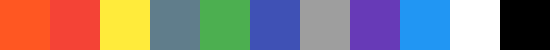

In [223]:
#----------------------------------------------#
col_dict = {tuple(elt[1]):i for (i, elt) in enumerate(img_RGB.getcolors())}
img_map = [col_dict[tuple(elt)] for elt in img_map_raw]

colors = [Image.fromarray(np.array(elt).reshape((1, 1, 3)).astype('uint8')).resize((50, 50)) for elt in col_dict.keys()]
#----------------------------------------------#

image_grid(colors, rows=1, cols=len(colors))

## Mapping color to unicode

In [268]:
#----------------------------------------------#
txts = [" ", "|", "-", "*", "^", "(", ")", "+", "=", "&", "!"]
#----------------------------------------------#
display(Markdown(f'# {"  ".join(txts)}'))

#    |  -  *  ^  (  )  +  =  &  !

---

## Converting to unicode map

In [269]:
#----------------------------------------------#
txt_arr = np.reshape(np.array([txts[bit] for bit in img_map]), img_shape[:-1])
txt_map = "\n".join(["".join(elt) for elt in txt_arr.tolist()])
#----------------------------------------------#
print(txt_map)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!+!!!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!+++!!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!  !!!!!!!!!!!!!!!!!+++++!!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!+++++++!!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!+*)))))*+!!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!++*!!!!!*++!!!!!!!!!
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!!!!!!!!!!!!!!!!!!!!!!!!!!  !!!!!!!!!!!!!!!*!!!!!*!!

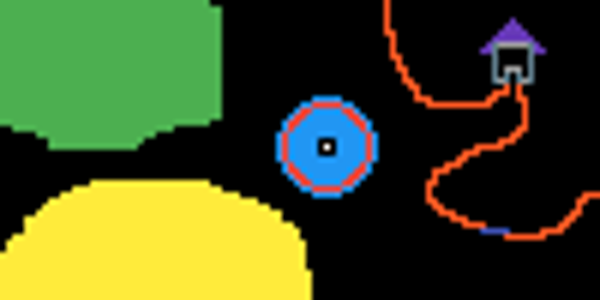

In [265]:
img_RGB.resize(tuple(6 * i for i in img_size))

# Surface creation

### Specify which surfaces are decorations

(No interactions, purely aesthetic)

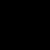

Is it a decoration? (y/n): y


In [241]:
decor_mask = np.empty(len(colors),  dtype=bool)

for ind, col in enumerate(colors):
    
    clear_output(wait=True)
    display(col)
    decor_mask[ind] = True if input("Is it a decoration? (y/n): ") == "y" else False

### If these are the desired decoration surfaces, proceed. Else, re-run previous cell.

In [242]:
decor_colors = [color for (color, mask) in zip(colors, decor_mask) if mask]
surf_colors = [color for (color, mask) in zip(colors, decor_mask) if not mask]

### Decoration tiles

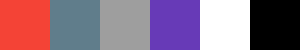

In [243]:
display(Markdown("### Decoration tiles"))
image_grid(decor_colors, rows=1, cols=len(decor_colors))

### Surface tiles

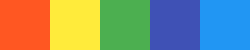

In [244]:
display(Markdown("### Surface tiles"))
image_grid(surf_colors, rows=1, cols=len(surf_colors))

## Metadata collection
```"{surface name}, {isWalkable}"```

Input must be a string separated by a comma, with first part having the name, and second part either 0/1 based on walkability of surface.

For example,
- Grass, 1
- Wall, 0
- Water, 0

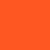

Meta-data: Fence, 0


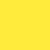

Meta-data: Sand,0


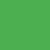

Meta-data: Grass,1


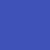

Meta-data: Gate,0


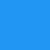

Meta-data: Water, 0


In [245]:
metadata = []

for col, surf in zip(surf_colors, txts):
    display(col)
    metadata.append(input("Meta-data: "))

In [278]:
names, walkables = zip(*[elt.split(",") for elt in metadata])
isWalkable = [bool(int(elt)) for elt in walkables]
chars = np.array(txts)[~decor_mask]

In [280]:
isWalkable

[False, False, True, False, False]

## Write to file

In [287]:
map_name = "Test"
map_path = "./maps/"
surface_path =  "./surfaces/"

#----------------------------------------------#
map_dict = {
    "name": map_name,
    "raw": txt_map
}

with open(map_path + map_name.lower() + ".map", "x") as outfile:
    json.dump(map_dict, outfile)
    
for name, char, walk in zip(names, chars, isWalkable):
    surf_dict = {
        "name": name,
        "character": char,
        "walkable": walk
    }
    
    with open(surface_path + name.lower() + ".surface", "x") as outfile:
        json.dump(surf_dict, outfile)
    
#----------------------------------------------#